In [1]:
%matplotlib inline
#computer vision
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import json

(429,645),(944,1040)


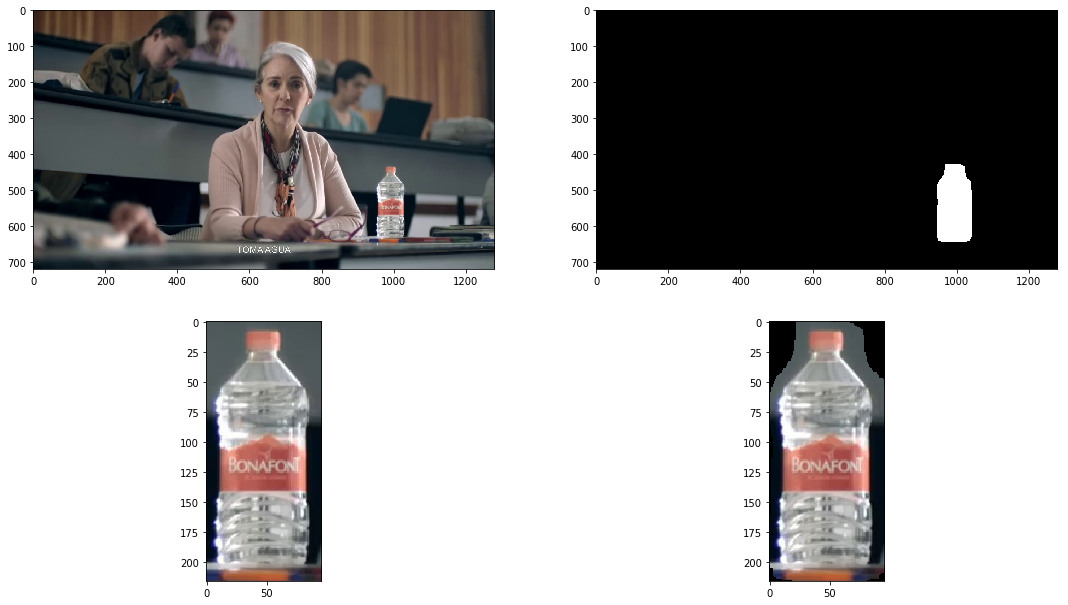

In [3]:
#read image
path = '1313.jpg'
img_in = cv.imread(path)
#create empty mask
img_thd = np.zeros(img_in.shape[:2],np.uint8)
#read json and fill with 255/white
add_limit = 8
with open('mask.json') as json_file:  
    data = json.load(json_file)
    for p in data:
        img_thd[p['y']-add_limit:p['y']+add_limit,
                p['x']-add_limit:p['x']+add_limit] = 255
#dilation
dilat_iter = 4
kernel = np.ones((dilat_iter,dilat_iter),np.uint8)
dilation = cv.dilate(img_thd, kernel, iterations = dilat_iter)
# Copy the thresholded image.
img_fill = dilation.copy()
# Mask used to flood filling.
h, w = img_fill.shape[:2]
mask_flood = np.zeros((h+2, w+2), np.uint8)
# Floodfill from point (0, 0)
cv.floodFill(img_fill, mask_flood, (0,0), 255);
img_fill_inv = cv.bitwise_not(img_fill)
# Invert floodfilled image
merge = img_fill_inv + dilation
#convert 255 to 1
mask_final = np.where(merge==255,1,0).astype('uint8')
#masking original image
img_final = img_in*mask_final[:,:,np.newaxis]
#obtain aoi
indices = np.where(mask_final != [0])
min_y = np.min(indices[0][np.nonzero(indices[0])])
max_y = np.max(indices[0])
min_x = np.min(indices[1][np.nonzero(indices[1])])
max_x = np.max(indices[1])

f = plt.figure()
f.set_size_inches(18.5, 10.5)

f.add_subplot(2,2,1)
plt.imshow(img_in[:,:,::-1], cmap='gray')

f.add_subplot(2,2,2)
plt.imshow(merge, cmap='gray')

f.add_subplot(2,2,3)
plt.imshow(img_in[min_y:max_y,min_x:max_x][:,:,::-1], cmap='gray')

f.add_subplot(2,2,4)
plt.imshow(img_final[min_y:max_y,min_x:max_x][:,:,::-1], cmap='gray')

cv.imwrite('crop_image.png', img_final[min_y:max_y,min_x:max_x])
print('(' + str(min_y) + ',' + str(max_y) + '),(' + str(min_x) + ',' + str(max_x) + ')')